In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import string
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
def load_data(path):
  df = pd.read_csv(path)
  y = np.array([label if label<9 else label-1 for label in df['label']])
  df = df.drop('label', axis=1)
  x = np.array([df.iloc[i].to_numpy().reshape((28,28)) for i in range(len(df))]).astype(float)
  x = np.expand_dims(x,axis=3)
  y = pd.get_dummies(y).values
  return x,y

X_train, Y_train = load_data('sign_mnist_train.csv')
X_test, Y_test = load_data('sign_mnist_test.csv')

In [ ]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(27455, 28, 28, 1) (27455, 24)
(7172, 28, 28, 1) (7172, 24)


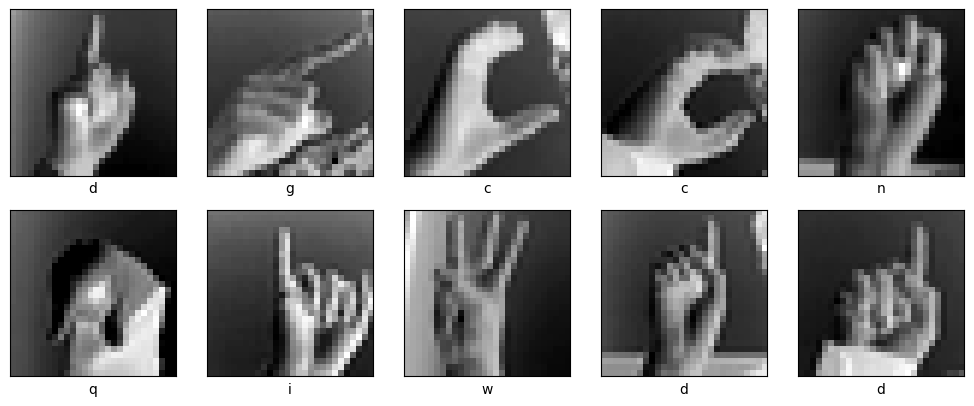

In [ ]:
class_names = list(string.ascii_lowercase[:26].replace('j','').replace('z',''))
plt.figure(figsize=(10,10))
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i].squeeze(), cmap=plt.cm.binary)
  plt.xlabel(class_names[np.argmax(Y_train, axis=1)[i]])

plt.tight_layout()
plt.show()

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3), activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24,activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 batch_normalization (Batch  (None, 1600)              6

In [ ]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0)  # You may need to add more augmentations
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)
train_generator = train_datagen.flow(X_train, Y_train, batch_size=32)
validation_generator = validation_datagen.flow(X_test, Y_test, batch_size=32)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator, validation_data=validation_generator,epochs=5,verbose=1)

Epoch 1/5
858/858 [==============================] - 40s 44ms/step - loss: 0.2455 - accuracy: 0.9373 - val_loss: 0.3921 - val_accuracy: 0.8776
Epoch 2/5
858/858 [==============================] - 38s 44ms/step - loss: 0.0098 - accuracy: 0.9993 - val_loss: 0.2792 - val_accuracy: 0.9262
Epoch 3/5
858/858 [==============================] - 37s 43ms/step - loss: 0.0299 - accuracy: 0.9925 - val_loss: 0.3523 - val_accuracy: 0.9009
Epoch 4/5
858/858 [==============================] - 36s 42ms/step - loss: 0.0052 - accuracy: 0.9992 - val_loss: 0.4375 - val_accuracy: 0.8903
Epoch 5/5
858/858 [==============================] - 36s 42ms/step - loss: 0.0103 - accuracy: 0.9974 - val_loss: 1.5395 - val_accuracy: 0.7455


In [ ]:
model.evaluate(validation_generator)

225/225 [==============================] - 2s 11ms/step - loss: 1.5395 - accuracy: 0.7455


[1.5394537448883057, 0.7455381751060486]

In [ ]:
model.save('/content/drive/MyDrive/saved_models/abc.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
